## Preprocessing 

In [1]:
# StandardScalar
# RobustScalar
# MinMaxScalar
# Normalizer

### When to do scaling?

In [2]:
# In general, algorithms that exploit distances or similarities (e.g. in form of scalar 
# product) between data samples, such as k-NN and SVM, are sensitive to feature 
# transformations.

# Graphical-model based classifiers, such as Fisher LDA or Naive Bayes, as well as 
# Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling,
# but still it might be a good idea to rescale/standartize your data.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y)



In [4]:
from sklearn.svm import SVC

model = SVC().fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.92018779342723 0.9020979020979021


In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model_ws = SVC().fit(X_train_scaled, y_train)
print(model_ws.score(X_train_scaled, y_train), model_ws.score(X_test_scaled, y_test))

0.9835680751173709 0.9790209790209791


In [7]:
# Scaling imporved the percentages by so much!!

## PCA (Principal Component Analysis)

In [8]:
# PCA is an important dimensionality reduction technique

In [9]:
# It helps reduce the number of features (columns), by clubbing together similiar features
# that have high correlation

In [10]:
# https://www.youtube.com/watch?v=g-Hb26agBFg

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
X_train.shape

(426, 30)

In [14]:
X_pca.shape

(426, 2)

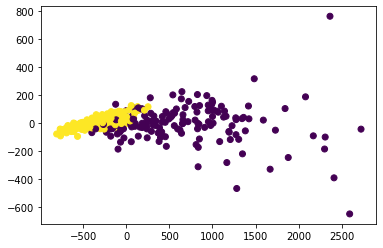

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)

In [16]:
# in this example, we have used PCA to perform dimensionality reduction and convert 
# 30 features into just 2 features, which can now be visualized using a 2D plot

In [17]:
# These 2 are called the FIRST TWO PRINCIPAL COMPONENTS


### First scaling, then applying PCA

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
pca = PCA(2)

X_train = pca.fit_transform(X_train)


In [20]:
X_train.shape

(426, 2)

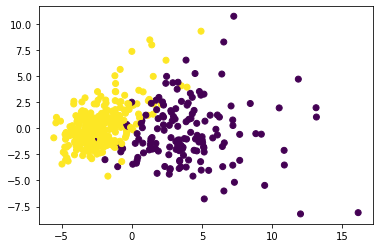

In [21]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [22]:
# Scaling helps distribute data more evenly

### Visualizing the coefficients using heat map

In [23]:
pca.components_

array([[ 0.21879857,  0.11216183,  0.22729711,  0.22081869,  0.14509524,
         0.23858881,  0.25901654,  0.25855764,  0.13260569,  0.06053587,
         0.20060047,  0.02344212,  0.20780693,  0.19757663,  0.02632296,
         0.18216311,  0.16954051,  0.18815461,  0.04938759,  0.10920458,
         0.22717805,  0.11128799,  0.2358071 ,  0.22366949,  0.13023125,
         0.20580869,  0.22579866,  0.24787961,  0.11588496,  0.12551015],
       [-0.23236423, -0.05865557, -0.21326608, -0.2323196 ,  0.19897702,
         0.16154133,  0.04589962, -0.03353192,  0.1872331 ,  0.37528192,
        -0.1327384 ,  0.04463051, -0.11562216, -0.17038989,  0.17580512,
         0.21681047,  0.16986142,  0.10426609,  0.15358444,  0.25857115,
        -0.21666622, -0.03982148, -0.19647916, -0.22011446,  0.1990765 ,
         0.16645251,  0.10882905,  0.00951277,  0.16675301,  0.29247006]])

Text(0, 0.5, 'Principal components')

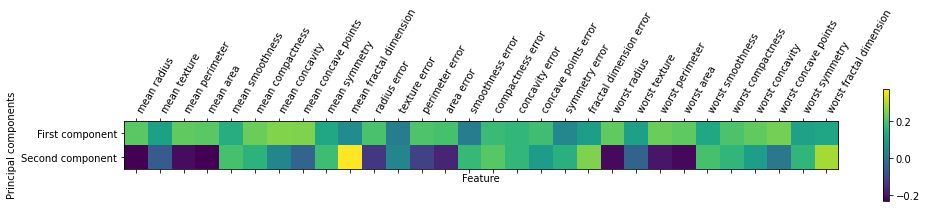

In [24]:
plt.matshow(pca.components_, cmap="viridis")

plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Principal components')

<Figure size 1296x1296 with 0 Axes>

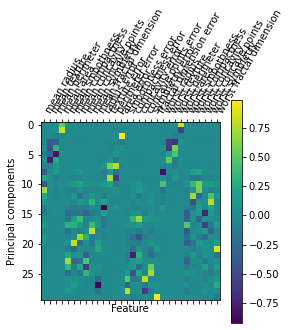

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)

plt.figure(figsize=(18,18))
plt.matshow(pca.components_, cmap="viridis")

plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [26]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [27]:
type(people)

sklearn.utils.Bunch

In [28]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [29]:
people.data.shape

(3023, 5655)

In [31]:
X, y = people.data, people.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.32142857142857145


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = X_train/255
X_test = X_test/255

scal = StandardScaler().fit(X_train)
X_train = scal.transform(X_train)
X_test = scal.transform(X_test)


pca = PCA(n_components=100, whiten=True).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.458994708994709


In [38]:
from sklearn.decomposition import NMF

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = X_train/255
X_test = X_test/255

nmf = NMF(n_components=7).fit(X_train)
X_train = nmf.transform(X_train)
X_test = nmf.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print(model.score(X_test, y_test))

/home/shivangi/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


0.17063492063492064


In [39]:
# t-SNE in manifold is another important technique that brings down data to only 2 features
# and very easy to visualize